# Machine Learning Support Vector Maching Classifier
### By: Jeremy Rico

Dataset: dataset1.csv, dataset2.csv
    

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Data import and manipulation
Here is where the data is imported and manipulated. It is also where I split up the data into training and testing samples.

In [100]:
# import csv data and convert to np.array
data1 = np.array(pd.read_csv("data/dataset1.csv", header = None))
data2 = np.array(pd.read_csv("data/dataset2.csv", header = None))
data3 = np.array(pd.read_csv("data/dataset3.csv", header = None))

# segment data into feature and label arrays
data1_X = np.hstack((data1[:, 0][:, None], data1[:, 1][:, None]))
data1_t  = data1[:, 2]
data2_X = np.hstack((data2[:, 0][:, None], data2[:, 1][:, None]))
data2_t  = data2[:, 2]
data3_X = np.hstack((data3[:, 0][:, None], data3[:, 1][:, None]))
data3_t  = data3[:, 2]

# split data into train and test
x1_train, x1_test, y1_train, y1_test = train_test_split(data1_X, data1_t, test_size=0.25, random_state=0)
x2_train, x2_test, y2_train, y2_test = train_test_split(data2_X, data2_t, test_size=0.25, random_state=0)
x3_train, x3_test, y3_train, y3_test = train_test_split(data3_X, data3_t, test_size=0.25, random_state=0)

# print number of data samples
print("Data 1:", x1_train.shape[0], "training samples,", x1_test.shape[0], "test samples")
print("Data 2:", x2_train.shape[0], "training samples,", x2_test.shape[0], "test samples")
print("Data 3:", x3_train.shape[0], "training samples,", x3_test.shape[0], "test samples")

Data 1: 150 training samples, 50 test samples
Data 2: 150 training samples, 50 test samples
Data 3: 150 training samples, 50 test samples


## Some quick data visualization

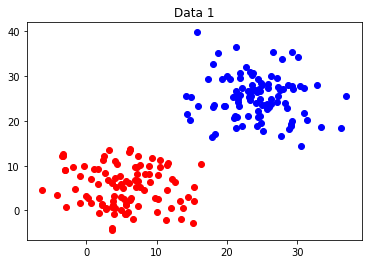

In [101]:
plt.figure()
styles = ['ro','bo']
classes = np.unique(data1_t)
for i,classn in enumerate(classes):
    pos = np.where(data1_t==classn)[0]
    plt.plot(data1_X[pos,0],data1_X[pos,1],styles[i])
    plt.title("Data 1")

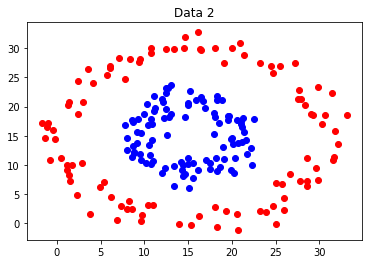

In [102]:
plt.figure()
styles = ['ro','bo']
classes = np.unique(data2_t)
for i,classn in enumerate(classes):
    pos = np.where(data2_t==classn)[0]
    plt.plot(data2_X[pos,0],data2_X[pos,1],styles[i])
    plt.title("Data 2")

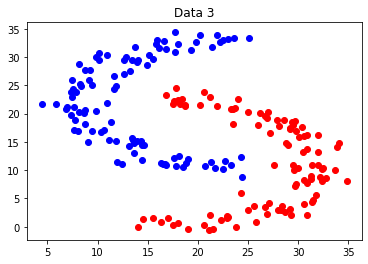

In [103]:
plt.figure()
styles = ['ro','bo']
classes = np.unique(data3_t)
for i,classn in enumerate(classes):
    pos = np.where(data3_t==classn)[0]
    plt.plot(data3_X[pos,0],data3_X[pos,1],styles[i])
    plt.title("Data 3")

## 1. Use a Support Vector Machine with a linear kernel to fit and score a binary classifier for dataset 1. 

In [104]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(x1_train, y1_train)
score = linear_svc.score(x1_test, y1_test)

print("Linear Model Score:  ", score)

Linear Model Score:   1.0


## 2. Use your code from Project 2 to plot the decision boundary for experiment (1). Since SVMs are non-probabilistic classifiers you will need to use predict instead of predict_proba.

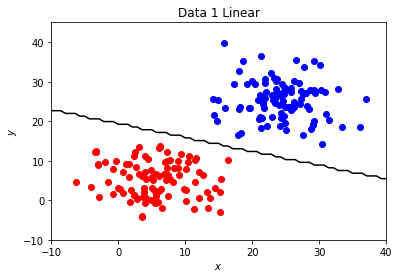

In [105]:
styles = ['ro','bo']
xlim = (-10, 40)
ylim = (-10, 45)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data1_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data1_t == classn)[0]
    ax.plot(data1_X[pos, 0], data1_X[pos, 1], styles[i])
    plt.title("Data 1 Linear")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

## 3. Repeat experiments (1) and (2) with the 'poly', 'rbf', and 'sigmoid' kernels. Do they produce different decision boundaries?

In [106]:
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(x1_train, y1_train)
score = poly_svc.score(x1_test, y1_test)

print("Poly Model Score:  ", score)

rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(x1_train, y1_train)
score = rbf_svc.score(x1_test, y1_test)

print("RBF Model Score:  ", score)

sig_svc = svm.SVC(kernel='sigmoid')
sig_svc.fit(x1_train, y1_train)
score = sig_svc.score(x1_test, y1_test)

print("Sigmoid Model Score:  ", score)

Poly Model Score:   1.0
RBF Model Score:   1.0
Sigmoid Model Score:   0.18


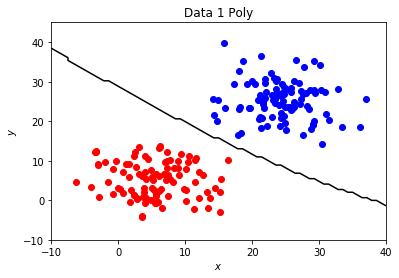

In [107]:
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data1_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data1_t == classn)[0]
    ax.plot(data1_X[pos, 0], data1_X[pos, 1], styles[i])
    plt.title("Data 1 Poly")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

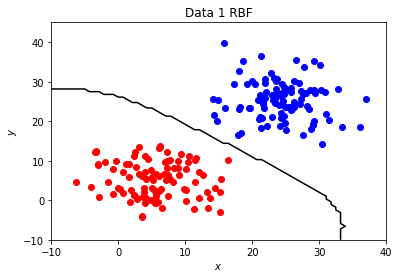

In [108]:
Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data1_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data1_t == classn)[0]
    ax.plot(data1_X[pos, 0], data1_X[pos, 1], styles[i])
    plt.title("Data 1 RBF")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

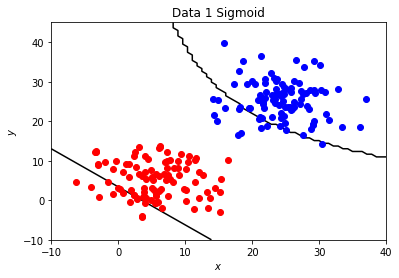

In [109]:
Z = sig_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data1_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data1_t == classn)[0]
    ax.plot(data1_X[pos, 0], data1_X[pos, 1], styles[i])
    plt.title("Data 1 Sigmoid")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

### Review
Based on the figures above, the linear and poly models produce similar boundary lines. The RBF model produces a slightly curved boundary and the sigmoid model produces two inaccurate boundary lines. 

## 4. Repeat experiments (1) through (3) with dataset 2. Which kernel produces the best decision boundary?

In [110]:
linear_svc2 = svm.SVC(kernel='linear')
linear_svc2.fit(x2_train, y2_train)
score = linear_svc2.score(x2_test, y2_test)

print("Linear Model Score:  ", score)

Linear Model Score:   0.46


/home/jeremy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: No contour levels were found within the data range.
  del sys.path[0]


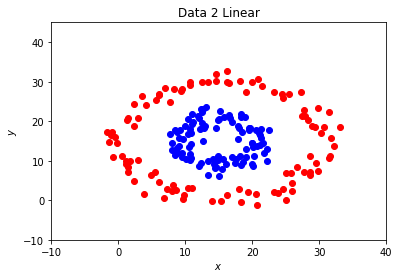

In [111]:
Z = linear_svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data2_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data2_t == classn)[0]
    ax.plot(data2_X[pos, 0], data2_X[pos, 1], styles[i])
    plt.title("Data 2 Linear")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

Data2 Linear is producing a line that's off the map?

In [112]:
poly_svc2 = svm.SVC(kernel='poly')
poly_svc2.fit(x2_train, y2_train)
score = poly_svc2.score(x2_test, y2_test)

print("Poly Model Score:  ", score)

rbf_svc2 = svm.SVC(kernel='rbf')
rbf_svc2.fit(x2_train, y2_train)
score = rbf_svc2.score(x2_test, y2_test)

print("RBF Model Score:  ", score)

sig_svc2 = svm.SVC(kernel='sigmoid')
sig_svc2.fit(x2_train, y2_train)
score = sig_svc2.score(x2_test, y2_test)

print("Sigmoid Model Score:  ", score)

Poly Model Score:   0.78
RBF Model Score:   1.0
Sigmoid Model Score:   0.42


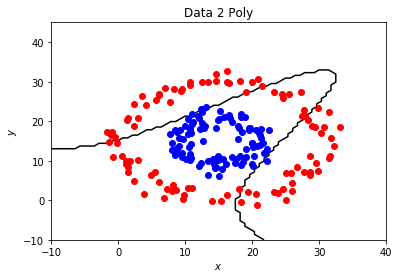

In [113]:
Z = poly_svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data2_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data2_t == classn)[0]
    ax.plot(data2_X[pos, 0], data2_X[pos, 1], styles[i])
    plt.title("Data 2 Poly")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

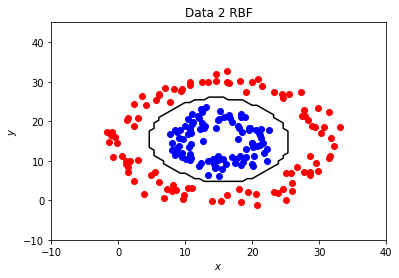

In [114]:
Z = rbf_svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data2_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data2_t == classn)[0]
    ax.plot(data2_X[pos, 0], data2_X[pos, 1], styles[i])
    plt.title("Data 2 RBF")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

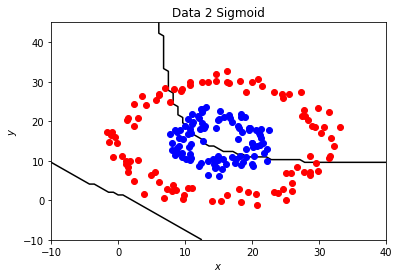

In [115]:
Z = sig_svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data2_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data2_t == classn)[0]
    ax.plot(data2_X[pos, 0], data2_X[pos, 1], styles[i])
    plt.title("Data 2 Sigmoid")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

### Review
The RBF kernal definitley produces the best boundary line. It correctly predicted the dataset with 100% accuracy. No other model came close to that amount of accuracy.

## 5. Try changing the degree for the 'poly' kernel from the default degree 3 to degree 5. Plot the decision boundary and create a confusion matrix for both models. What differences do you observe between the two?

In [116]:
poly_svc2_deg5 = svm.SVC(kernel='poly', degree=5)
poly_svc2_deg5.fit(x2_train, y2_train)
score = poly_svc2_deg5.score(x2_test, y2_test)

print("Poly Model (degree = 5) Score:  ", score)

Poly Model (degree = 5) Score:   0.84


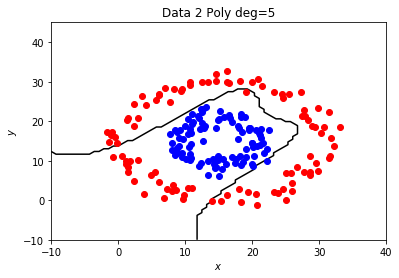

In [117]:
Z = poly_svc2_deg5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data2_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data2_t == classn)[0]
    ax.plot(data2_X[pos, 0], data2_X[pos, 1], styles[i])
    plt.title("Data 2 Poly deg=5")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

In [118]:
# Confusion matrix for poly degree 3
y_pred = poly_svc2.predict(x2_test)
conf_mat = confusion_matrix(y2_test, y_pred)
print("Degree = 3:\n", conf_mat)

# Confusion matrix for poly defree 5
y_pred5 = poly_svc2_deg5.predict(x2_test)
conf_mat5 = confusion_matrix(y2_test, y_pred5)
print("Degree = 5: \n", conf_mat5)

Degree = 3:
 [[17 10]
 [ 1 22]]
Degree = 5: 
 [[19  8]
 [ 0 23]]


### Review
Changing the degree to 5 adds another "squigly" to the model which increases its accuracy by 6%.

## 6. Repeat experiments (1) through (3) for dataset 3. Which kernel produces the best decision boundary? Does it seem as if the 'poly' kernel should have scored higher?

In [119]:
linear_svc3 = svm.SVC(kernel='linear')
linear_svc3.fit(x3_train, y3_train)
score = linear_svc3.score(x3_test, y3_test)

print("Linear Model Score:  ", score)

Linear Model Score:   0.88


In [120]:
poly_svc3 = svm.SVC(kernel='poly')
poly_svc3.fit(x3_train, y3_train)
score = poly_svc3.score(x3_test, y3_test)

print("Poly Model Score:  ", score)

rbf_svc3 = svm.SVC(kernel='rbf')
rbf_svc3.fit(x3_train, y3_train)
score = rbf_svc3.score(x3_test, y3_test)

print("RBF Model Score:  ", score)

sig_svc3 = svm.SVC(kernel='sigmoid')
sig_svc3.fit(x3_train, y3_train)
score = sig_svc3.score(x3_test, y3_test)

print("Sigmoid Model Score:  ", score)

Poly Model Score:   0.9
RBF Model Score:   1.0
Sigmoid Model Score:   0.6


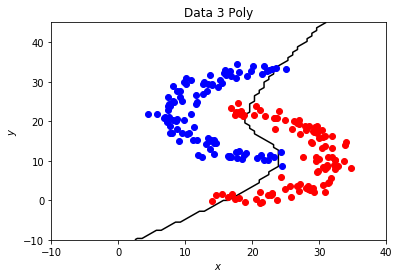

In [121]:
Z = poly_svc3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data3_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data3_t == classn)[0]
    ax.plot(data3_X[pos, 0], data3_X[pos, 1], styles[i])
    plt.title("Data 3 Poly")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

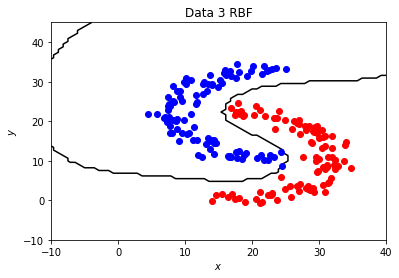

In [122]:
Z = rbf_svc3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data3_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data3_t == classn)[0]
    ax.plot(data3_X[pos, 0], data3_X[pos, 1], styles[i])
    plt.title("Data 3 RBF")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

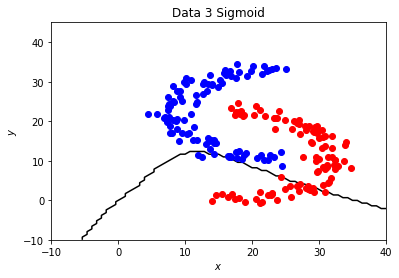

In [123]:
Z = sig_svc3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data3_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data3_t == classn)[0]
    ax.plot(data3_X[pos, 0], data3_X[pos, 1], styles[i])
    plt.title("Data 3 Sigmoid")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

### Review
Again, RBF produces the highest accuracy and best boundary line. However, it seems that poly came pretty close. Maybe by increasing the degree of the polynomial we could obtain a higher accuracy. 

### 7. Use grid search with cross-validation to determine which combination of hyperparameters produces the best fit for the 'poly' kernel. Try the following:
- Regularization parameter C values of 0.001, 0.01, 0.1, and 1.0

- Polynomial degrees 3, 5, and 7

- Independent coef0 terms 0.01, 0.1, and 1.0


Which values turn out to be the best_params_? Plot the decision boundary and create a confusion matrix to verify this.

In [124]:
parameters = {'C':[0.001, 0.01, 0.1, 1.0], 'degree':[3, 5, 7], 'coef0':[0.01, 0.1, 1.0]}
poly_svc3 = svm.SVC(kernel='poly')
poly_svc3_grid = GridSearchCV(poly_svc3, parameters)
poly_svc3_grid.fit(x3_train, y3_train)
print("Best Parameters: ", poly_svc3_grid.best_params_)

{'C': 0.1, 'coef0': 1.0, 'degree': 5}


In [125]:
poly_svc3_best = svm.SVC(kernel='poly', C=0.1, coef0=1.0, degree=5)
poly_svc3_best.fit(x3_train, y3_train)
score = poly_svc3_best.score(x3_test, y3_test)

print("Poly Model Score:  ", score)


Poly Model Score:   1.0


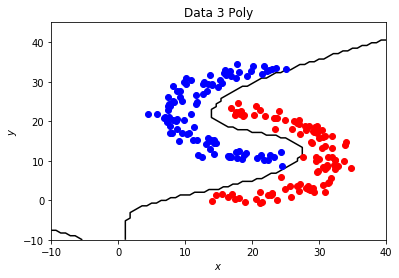

In [126]:
Z = poly_svc3_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
classes = np.unique(data3_t)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
for i, classn in enumerate(classes):
    pos = np.where(data3_t == classn)[0]
    ax.plot(data3_X[pos, 0], data3_X[pos, 1], styles[i])
    plt.title("Data 3 Poly")

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

In [127]:
# Confusion matrix for poly
y_pred_best = poly_svc3_best.predict(x3_test)
conf_mat_best = confusion_matrix(y3_test, y_pred_best)
print(conf_mat_best)

[[25  0]
 [ 0 25]]


### Review
This model predicts with 100% accuracy! Using grid search to tune hyperparameters found us the perfect coefficient to fit the data with a polynomial function. This can be seen in the boundary line as well as the perfect confusion matrix.